In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading csv file into our workspace

In [74]:
df = pd.read_csv('uber-raw-data-apr14.txt', sep=',')
df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  564516 non-null  object 
 1   Lat        564516 non-null  float64
 2   Lon        564516 non-null  float64
 3   Base       564516 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.2+ MB


### convert Data/Time column to date-time object

In [76]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

In [77]:
df.head()

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


In [78]:
df.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dtype: object

In [79]:
def get_dom (dt):
    return dt.day
df['dom'] = df['Date/Time'].map(get_dom)

In [80]:
df.head()

,Date/Time,Lat,Lon,Base,dom
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1


In [81]:
def get_weekday(dt):
    return dt.day_name()
df['Day_of_Week'] = df['Date/Time'].map(get_weekday)

def get_hour(dt):
    return dt.hour
df['hour'] = df['Date/Time'].map(get_hour)

df.head()

,Date/Time,Lat,Lon,Base,dom,Day_of_Week,hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,Tuesday,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,Tuesday,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,Tuesday,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,Tuesday,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,Tuesday,0


# Analysis

## Let's analyze the day of month (DoM)

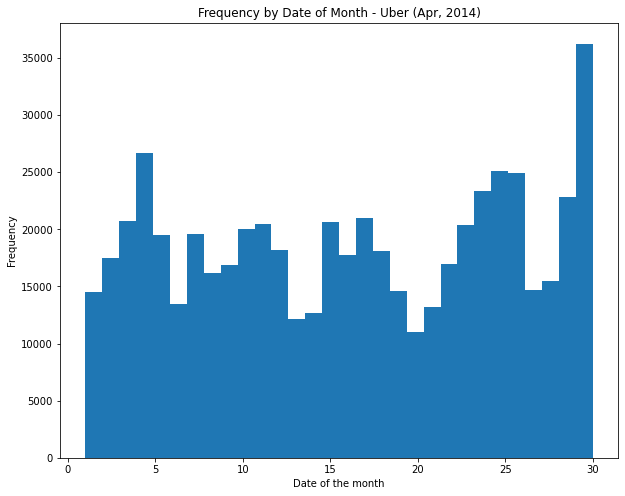

In [82]:
plt.figure(figsize=(10,8))
plt.hist(df.dom, bins=30)
plt.xlabel('Date of the month')
plt.ylabel('Frequency')
plt.title('Frequency by Date of Month - Uber (Apr, 2014)')
plt.show()

## Same plot using group by and sorted series plotting

In [83]:
def count_rows(rows):
    return len(rows)
group_by_day = df.groupby('dom').apply(count_rows)
group_by_day_sorted = group_by_day.sort_values()

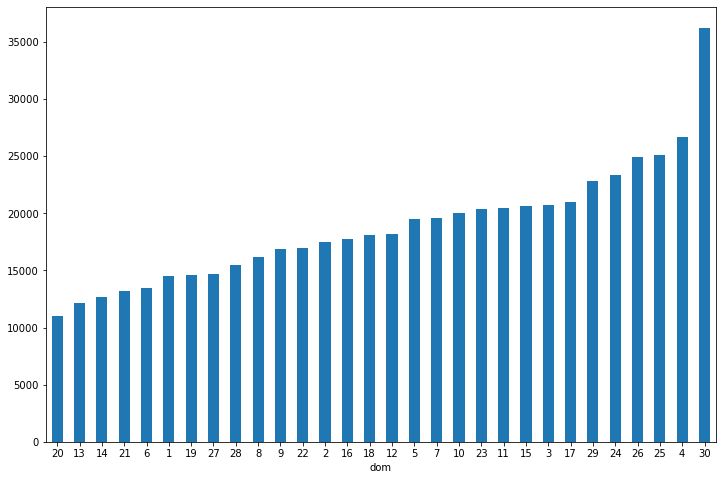

In [84]:
group_by_day_sorted.plot(kind='bar', figsize=(12,8))
plt.xticks(rotation=0)
plt.show()

## Let's analyze the frequency against the weekday

In [85]:
weekday_grouped = df.groupby(['Day_of_Week'], sort=False)['Date/Time'].count()

Text(0.5, 1.0, 'Frequency by Day of the Week - (Apr, 2014)')

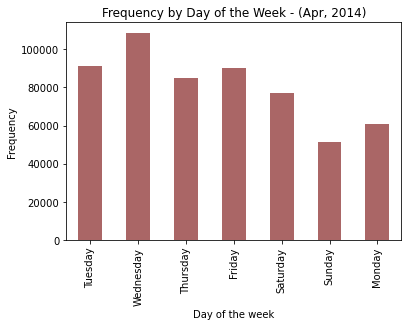

In [86]:
weekday_grouped.plot(kind='bar',color='#AA6666')
plt.xlabel('Day of the week')
plt.ylabel('Frequency')
plt.title('Frequency by Day of the Week - (Apr, 2014)')

## Let's analyze the frequency against hour of each day

In [87]:
df.head(1)

,Date/Time,Lat,Lon,Base,dom,Day_of_Week,hour
0,2014-04-01 00:11:00,40.769,-73.9549,B02512,1,Tuesday,0


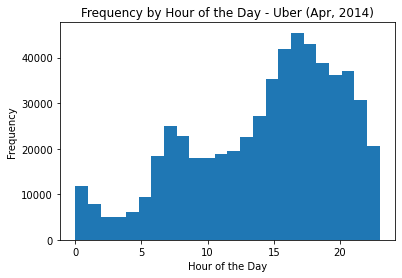

In [88]:
plt.hist(df.hour, bins=24)
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.title('Frequency by Hour of the Day - Uber (Apr, 2014)')
plt.show()

## Let's analyze Date of Month and hour of the day together

### Using historgram

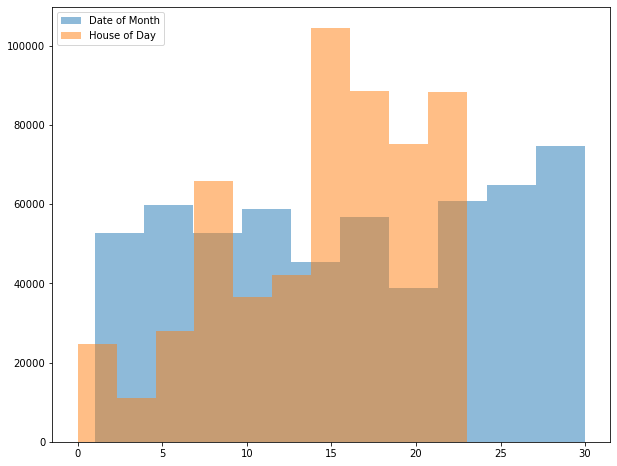

In [89]:
plt.figure(figsize=(10,8))
plt.hist(df.dom,alpha=0.5, label='Date of Month')
plt.hist(df.hour,alpha=0.5, label='House of Day')
plt.legend(loc='upper left')
plt.show()

## Let's analyze Day of Week and hour of the day together

### We can use seaborn's heatmap for better information

<AxesSubplot:xlabel='hour', ylabel='Day_of_Week'>

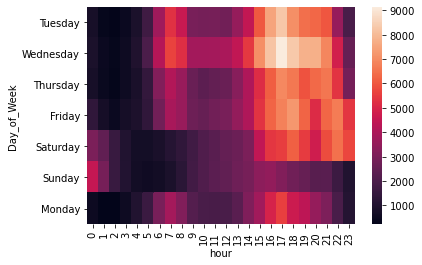

In [90]:
sns.heatmap(df.groupby('Day_of_Week hour'.split(), sort=False)['Date/Time'].count().unstack())

## Let's analyze the Lat and Long column

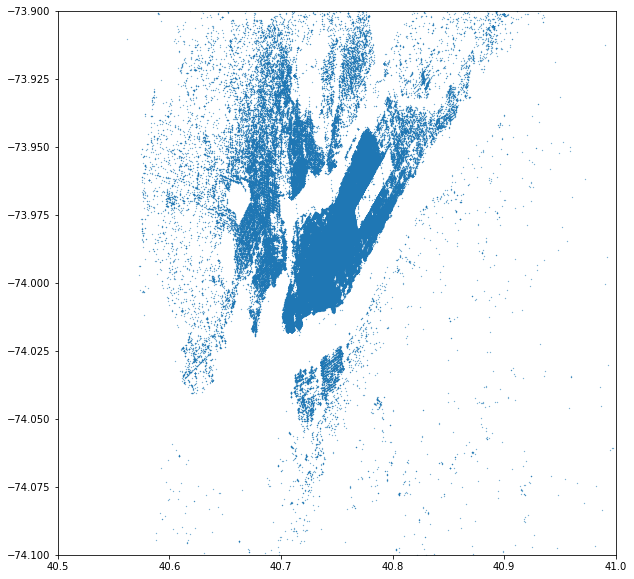

In [91]:
plt.figure(figsize=(10,10))
plt.plot(df.Lat, df.Lon, '.', ms=0.5)
plt.xlim(40.5,41)
plt.ylim(-74.1,-73.9)
plt.show()

### Lat histogram

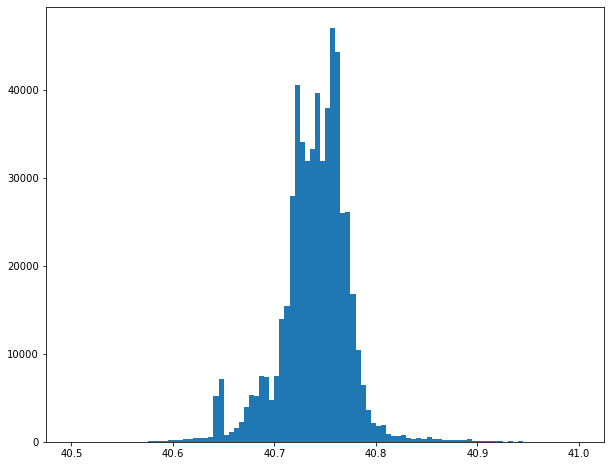

In [92]:
plt.figure(figsize=(10,8))
plt.hist(df.Lat,bins=100, range = (40.5, 41))
plt.show()

### Long Histogram

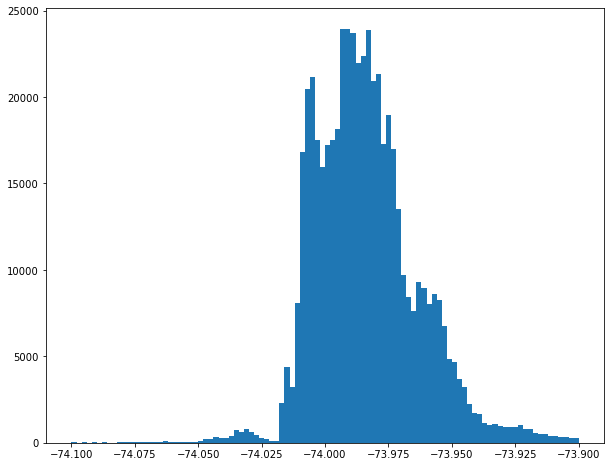

In [93]:
plt.figure(figsize=(10,8))
plt.hist(df.Lon, bins=100, range=(-74.1, -73.9))
plt.show()

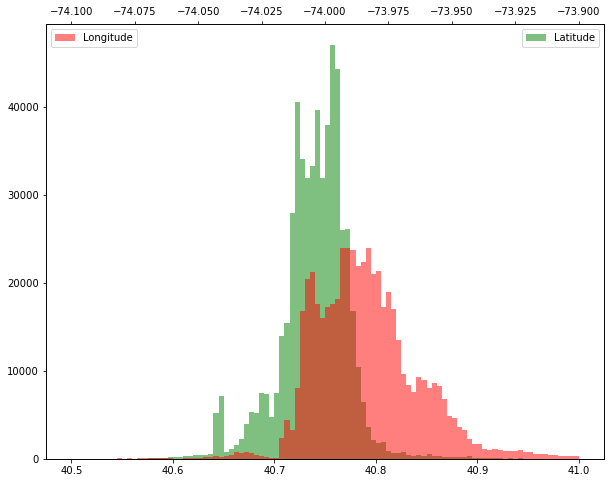

In [94]:
plt.figure(figsize=(10,8))
plt.hist(df.Lat,bins=100, label='Latitude',color='g',range=(40.5,41),alpha=0.5)
plt.legend(loc='upper right')
plt.twiny()
plt.hist(df.Lon, bins=100, label='Longitude', color='r', range=(-74.1,-73.9),alpha=0.5)
plt.legend(loc='upper left')
plt.show()